In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

metro_all = pd.read_csv('seoul_subway_timeline.csv', encoding='cp949')
#metro_all

In [5]:
#metro_all.head()
#metro_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53266 entries, 0 to 53265
Data columns (total 52 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   사용월           53266 non-null  int64 
 1   호선명           53266 non-null  object
 2   지하철역          53266 non-null  object
 3   04시-05시 승차인원  53266 non-null  int64 
 4   04시-05시 하차인원  53266 non-null  int64 
 5   05시-06시 승차인원  53266 non-null  int64 
 6   05시-06시 하차인원  53266 non-null  int64 
 7   06시-07시 승차인원  53266 non-null  int64 
 8   06시-07시 하차인원  53266 non-null  int64 
 9   07시-08시 승차인원  53266 non-null  int64 
 10  07시-08시 하차인원  53266 non-null  int64 
 11  08시-09시 승차인원  53266 non-null  int64 
 12  08시-09시 하차인원  53266 non-null  int64 
 13  09시-10시 승차인원  53266 non-null  int64 
 14  09시-10시 하차인원  53266 non-null  int64 
 15  10시-11시 승차인원  53266 non-null  int64 
 16  10시-11시 하차인원  53266 non-null  int64 
 17  11시-12시 승차인원  53266 non-null  int64 
 18  11시-12시 하차인원  53266 non-null  int64 
 19  12시-

In [8]:
sorted(list(set(metro_all['사용월'])))
sorted(list(set(metro_all['호선명'])))
sorted(list(set(metro_all['지하철역'])))
len(list(set(metro_all['지하철역'])))

588

In [11]:
metro_recent = metro_all[metro_all['사용월'] == 202206]
#metro_recent

metro_recent = metro_recent.drop(columns=('작업일자'))

,사용월,호선명,지하철역,04시-05시 승차인원,04시-05시 하차인원,05시-06시 승차인원,05시-06시 하차인원,06시-07시 승차인원,06시-07시 하차인원,07시-08시 승차인원,...,23시-24시 승차인원,23시-24시 하차인원,00시-01시 승차인원,00시-01시 하차인원,01시-02시 승차인원,01시-02시 하차인원,02시-03시 승차인원,02시-03시 하차인원,03시-04시 승차인원,03시-04시 하차인원
0,202206,1호선,동대문,890,31,11300,2056,8821,7698,14163,...,4350,8677,25,1595,0,0,0,0,0,0
1,202206,1호선,동묘앞,170,3,2827,1104,3321,5042,6249,...,1312,3604,31,2129,0,0,1,0,0,0
2,202206,1호선,서울역,646,24,8433,7694,12608,46963,39233,...,20385,15480,158,1332,1,4,0,1,0,0
3,202206,1호선,시청,271,7,3133,4802,3321,23621,6647,...,9254,2938,72,422,0,2,0,0,0,0
4,202206,1호선,신설동,370,19,8467,2653,8568,11348,18684,...,3482,7832,232,1578,1,12,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
610,202206,중앙선,원덕,75,1,441,4,758,175,976,...,4,326,0,42,0,0,0,0,0,0
611,202206,중앙선,중랑,151,4,5986,520,9953,2158,23142,...,947,4955,17,392,0,0,0,0,0,0
612,202206,중앙선,지평,0,0,0,0,2,0,380,...,0,0,0,0,0,0,0,0,0,0
613,202206,중앙선,팔당,2,0,297,79,932,793,1642,...,163,435,0,0,0,0,0,0,0,0


In [15]:
metro_line = metro_recent.groupby(['호선명']).mean().reset_index()
metro_line = metro_line.drop(columns='사용월').set_index('호선명')

metro_line = metro_line.mean(axis=1).sort_values(ascending=False)
metro_line


호선명
2호선         31428.889583
1호선         26214.647917
4호선         21596.346154
3호선         17585.783088
경인선         16309.923958
과천선         15084.281250
7호선         14593.280344
경부선         13657.048077
5호선         12994.740327
9호선         12807.770833
분당선         12299.262500
8호선         11957.295139
일산선         11269.869318
안산선         10942.552885
6호선          9768.548611
9호선2~3단계     8787.972756
공항철도 1호선     8700.372024
경원선          7827.769444
중앙선          5244.388889
경의선          4654.295387
우이신설선        3978.262821
수인선          3938.527778
신림선          3463.039773
경강선          3376.581439
장항선          2703.970238
경춘선          2517.703947
dtype: float64

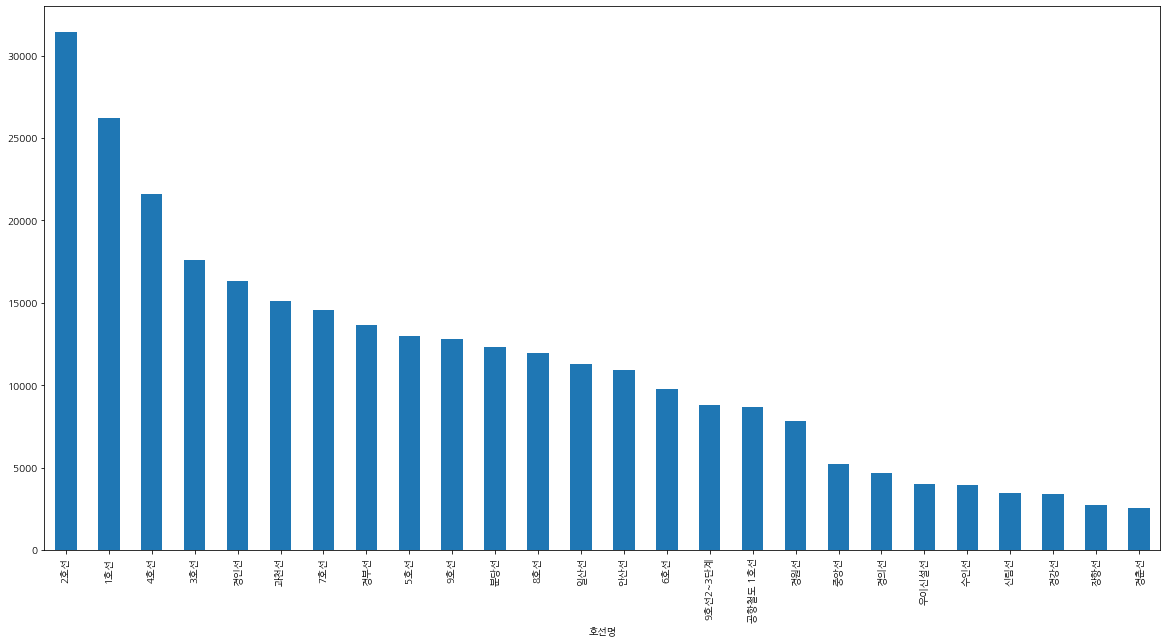

In [16]:
plt.figure(figsize=(20,10))
metro_line.plot(kind=('bar'))
plt.show()


In [17]:
line = '1호선'
metro_st = metro_recent.groupby(['호선명', '지하철역']).mean().reset_index()
metro_st_line1 = metro_st[metro_st['호선명'] == line]
#metro_st_line1

,호선명,지하철역,사용월,04시-05시 승차인원,04시-05시 하차인원,05시-06시 승차인원,05시-06시 하차인원,06시-07시 승차인원,06시-07시 하차인원,07시-08시 승차인원,...,23시-24시 승차인원,23시-24시 하차인원,00시-01시 승차인원,00시-01시 하차인원,01시-02시 승차인원,01시-02시 하차인원,02시-03시 승차인원,02시-03시 하차인원,03시-04시 승차인원,03시-04시 하차인원
0,1호선,동대문,202206.0,890.0,31.0,11300.0,2056.0,8821.0,7698.0,14163.0,...,4350.0,8677.0,25.0,1595.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1호선,동묘앞,202206.0,170.0,3.0,2827.0,1104.0,3321.0,5042.0,6249.0,...,1312.0,3604.0,31.0,2129.0,0.0,0.0,1.0,0.0,0.0,0.0
2,1호선,서울역,202206.0,646.0,24.0,8433.0,7694.0,12608.0,46963.0,39233.0,...,20385.0,15480.0,158.0,1332.0,1.0,4.0,0.0,1.0,0.0,0.0
3,1호선,시청,202206.0,271.0,7.0,3133.0,4802.0,3321.0,23621.0,6647.0,...,9254.0,2938.0,72.0,422.0,0.0,2.0,0.0,0.0,0.0,0.0
4,1호선,신설동,202206.0,370.0,19.0,8467.0,2653.0,8568.0,11348.0,18684.0,...,3482.0,7832.0,232.0,1578.0,1.0,12.0,0.0,0.0,0.0,0.0
5,1호선,제기동,202206.0,441.0,2.0,4888.0,2214.0,8551.0,9419.0,21610.0,...,2040.0,6711.0,42.0,780.0,1.0,1.0,0.0,0.0,0.0,0.0
6,1호선,종각,202206.0,91.0,9.0,4007.0,3960.0,3682.0,22533.0,5814.0,...,27781.0,3590.0,315.0,394.0,0.0,1.0,0.0,0.0,0.0,0.0
7,1호선,종로3가,202206.0,190.0,12.0,3882.0,3261.0,3570.0,14038.0,4746.0,...,17170.0,4119.0,310.0,843.0,3.0,3.0,0.0,0.0,0.0,0.0
8,1호선,종로5가,202206.0,34.0,0.0,1730.0,3909.0,2986.0,16406.0,5020.0,...,6208.0,2628.0,98.0,668.0,0.0,0.0,0.0,0.0,0.0,0.0
9,1호선,청량리(서울시립대입구),202206.0,887.0,14.0,10765.0,4593.0,14934.0,22471.0,35371.0,...,3165.0,9765.0,84.0,1613.0,0.0,0.0,0.0,0.0,0.0,0.0


In [20]:
# 승차 인원 분리
metro_get_on = pd.DataFrame()
metro_get_on['지하철역'] = metro_st_line1['지하철역']
for i in range(int((len(metro_recent.columns)-3)/2)):
    metro_get_on[metro_st_line1.columns[3+2*i]] = metro_st_line1[metro_st_line1.columns[3+2*i]]
metro_get_on = metro_get_on.set_index('지하철역')
metro_get_on


,04시-05시 승차인원,05시-06시 승차인원,06시-07시 승차인원,07시-08시 승차인원,08시-09시 승차인원,09시-10시 승차인원,10시-11시 승차인원,11시-12시 승차인원,12시-13시 승차인원,13시-14시 승차인원,...,18시-19시 승차인원,19시-20시 승차인원,20시-21시 승차인원,21시-22시 승차인원,22시-23시 승차인원,23시-24시 승차인원,00시-01시 승차인원,01시-02시 승차인원,02시-03시 승차인원,03시-04시 승차인원
지하철역,,,,,,,,,,,,,,,,,,,,,
동대문,890.0,11300.0,8821.0,14163.0,18873.0,17325.0,16419.0,18122.0,21598.0,23154.0,...,22768.0,16566.0,14190.0,13069.0,11218.0,4350.0,25.0,0.0,0.0,0.0
동묘앞,170.0,2827.0,3321.0,6249.0,9677.0,8695.0,10365.0,15059.0,21497.0,27673.0,...,21259.0,10054.0,5874.0,4991.0,3564.0,1312.0,31.0,0.0,1.0,0.0
서울역,646.0,8433.0,12608.0,39233.0,65106.0,54833.0,54970.0,65919.0,73911.0,75158.0,...,194098.0,97875.0,69808.0,76345.0,51224.0,20385.0,158.0,1.0,0.0,0.0
시청,271.0,3133.0,3321.0,6647.0,8294.0,9211.0,10835.0,16716.0,19234.0,24405.0,...,144407.0,51494.0,44062.0,43072.0,29032.0,9254.0,72.0,0.0,0.0,0.0
신설동,370.0,8467.0,8568.0,18684.0,26419.0,17655.0,15675.0,18353.0,19631.0,21564.0,...,52042.0,19977.0,13881.0,12202.0,8766.0,3482.0,232.0,1.0,0.0,0.0
제기동,441.0,4888.0,8551.0,21610.0,30791.0,22427.0,26035.0,32669.0,36385.0,38350.0,...,39498.0,18875.0,12088.0,8618.0,5458.0,2040.0,42.0,1.0,0.0,0.0
종각,91.0,4007.0,3682.0,5814.0,9612.0,11847.0,16040.0,24526.0,30613.0,40174.0,...,192630.0,81385.0,72603.0,80861.0,65832.0,27781.0,315.0,0.0,0.0,0.0
종로3가,190.0,3882.0,3570.0,4746.0,8589.0,13179.0,19047.0,29424.0,41102.0,48210.0,...,94729.0,57840.0,48259.0,51274.0,42291.0,17170.0,310.0,3.0,0.0,0.0
종로5가,34.0,1730.0,2986.0,5020.0,8550.0,11925.0,19836.0,29381.0,38879.0,47090.0,...,93526.0,46741.0,34020.0,31369.0,22016.0,6208.0,98.0,0.0,0.0,0.0


In [22]:
# 하차 인원 분리

metro_get_off = pd.DataFrame()
metro_get_off['지하철역'] = metro_st_line1['지하철역']
for i in range(int((len(metro_recent.columns)-3)/2)):
    metro_get_off[metro_st_line1.columns[4+2*i]] = metro_st_line1[metro_st_line1.columns[4+2*i]]
metro_get_off = metro_get_off.set_index('지하철역')

#metro_get_off


In [26]:
df = pd.DataFrame(index = metro_st_line1['지하철역'])
df['평균 승차 인원 수'] = metro_get_on.mean(axis=1).astype(int)
df['평균 하차 인원 수'] = metro_get_off.mean(axis=1).astype(int)

df

,평균 승차 인원 수,평균 하차 인원 수
지하철역,,
동대문,13759,13229
동묘앞,11204,11618
서울역,56061,54597
시청,25739,25910
신설동,15716,14966
제기동,20081,20462
종각,40256,39059
종로3가,31247,28427
종로5가,27027,27027


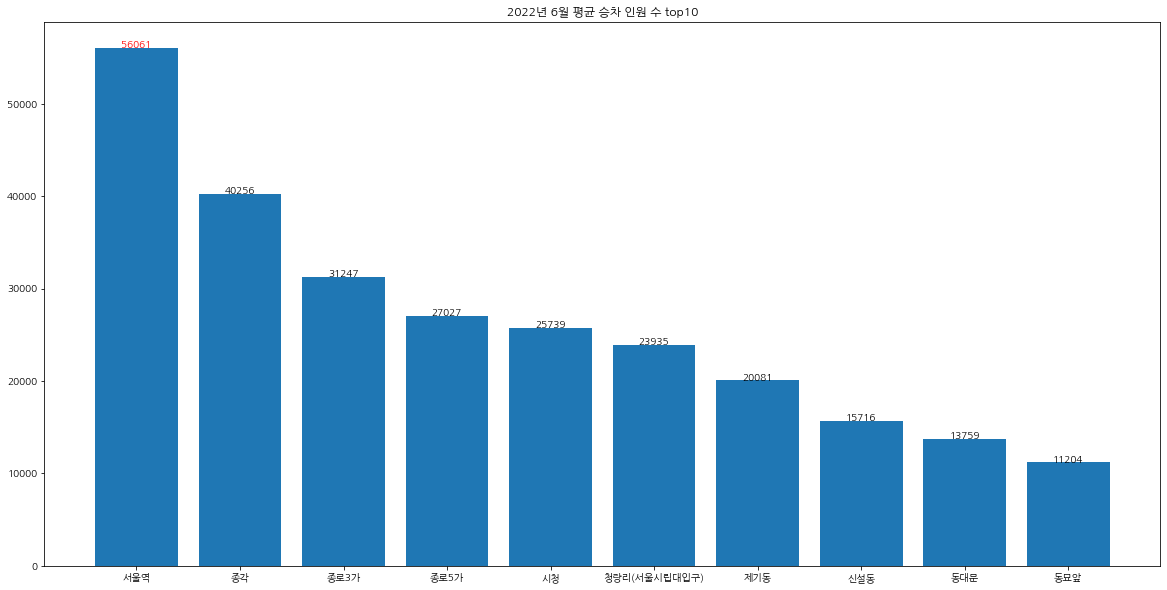

In [27]:
#평균 승차 인원수 내림차순으로 그래프 출력

top10_on = df.sort_values(by='평균 승차 인원 수', ascending=False).head(10)

plt.figure(figsize=(20,10))
plt.bar(top10_on.index, top10_on['평균 승차 인원 수'])
for x, y in enumerate(list(top10_on['평균 승차 인원 수'])):
    if x == 0:
        plt.annotate(y, (x-0.15, y), color = 'red')
    else:
        plt.annotate(y, (x-0.15, y))
        
plt.title('2022년 6월 1호선 평균 승차 인원 수 top10')
plt.show()


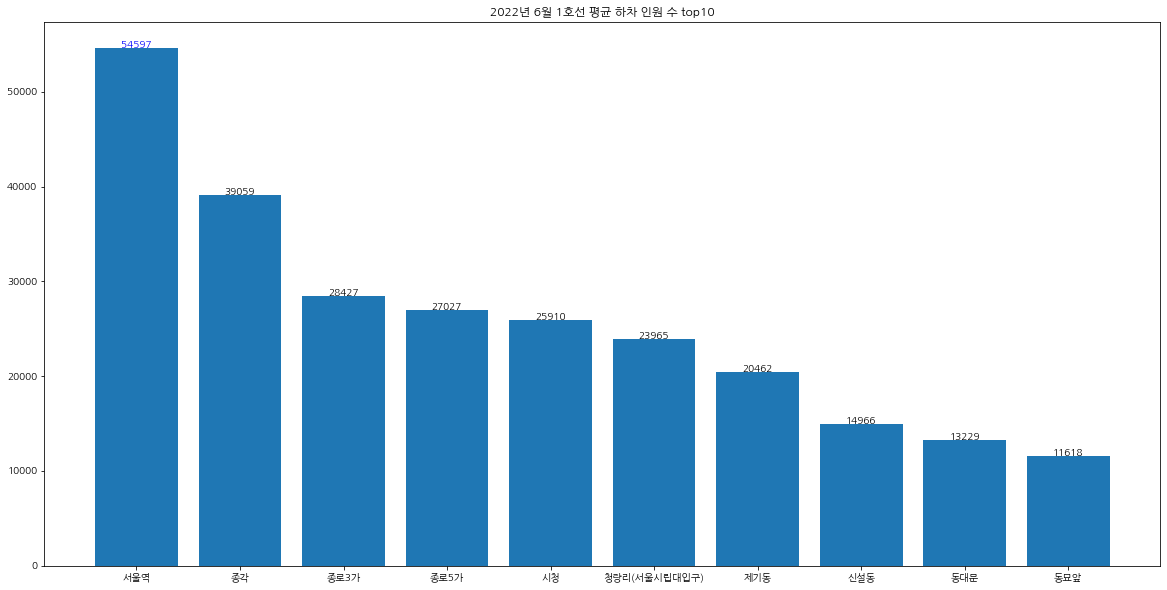

In [34]:
# 평균 하차 인원수 내림차순으로 그래프 출력

top10_off = df.sort_values(by='평균 하차 인원 수', ascending=False).head(15)

plt.figure(figsize=(20,10))
plt.bar(top10_off.index, top10_off['평균 하차 인원 수'])
for x, y in enumerate(list(top10_off['평균 하차 인원 수'])):
    if x == 0:
        plt.annotate(y, (x-0.15, y), color = 'blue')
    else:
        plt.annotate(y, (x-0.15, y))
        
plt.title('2022년 6월 1호선 평균 하차 인원 수 top10')
plt.show()
